## Import default Library & Check Data 
<a id="#1"></a>


In [6]:
# Data Processing
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.dpi'] = 300
import seaborn as sns
sns.set_palette('husl')


import bokeh
from bokeh.io import show, output_notebook
from bokeh.palettes import Spectral9
from bokeh.plotting import figure
output_notebook() # You can use output_file()


import wordcloud
from wordcloud import WordCloud # wordcloud
import networkx as nx

Loading BokehJS ...

In [7]:
# Version Check!!
print("matplotlib", matplotlib.__version__)
print("seaborn", sns.__version__)
print("bokeh", bokeh.__version__)
print("missingno", missingno.__version__)
print("wordcloud", wordcloud.__version__)
print("networkX", nx.__version__)

matplotlib 3.4.3
seaborn 0.11.2
bokeh 2.4.1
missingno 0.5.1
wordcloud 1.8.1
networkX 2.6.3


In [8]:
data = pd.read_csv('appstore_games.csv')

In [9]:
data.describe() #numeric

ID  Average User Rating  User Rating Count         Price  \
count  1.700700e+04          7561.000000       7.561000e+03  16983.000000   
mean   1.059614e+09             4.060905       3.306531e+03      0.813419   
std    2.999676e+08             0.751428       4.232256e+04      7.835732   
min    2.849214e+08             1.000000       5.000000e+00      0.000000   
25%    8.996543e+08             3.500000       1.200000e+01      0.000000   
50%    1.112286e+09             4.500000       4.600000e+01      0.000000   
75%    1.286983e+09             4.500000       3.090000e+02      0.000000   
max    1.475077e+09             5.000000       3.032734e+06    179.990000   

               Size  
count  1.700600e+04  
mean   1.157064e+08  
std    2.036477e+08  
min    5.132800e+04  
25%    2.295014e+07  
50%    5.676895e+07  
75%    1.330271e+08  
max    4.005591e+09

In [10]:
data.describe(include='O') #categorical

URL       Name  \
count                                               17007      17007   
unique                                              16847      16847   
top     https://apps.apple.com/us/app/additions/id1432...  Additions   
freq                                                    2          2   

              Subtitle                                           Icon URL  \
count             5261                                              17007   
unique            5010                                              16847   
top     Emoji Stickers  https://is1-ssl.mzstatic.com/image/thumb/Purpl...   
freq                14                                                  2   

       In-app Purchases Description  \
count              7683       17007   
unique             3803       16473   
top                0.99      #NAME?   
freq                943          17   

                                         Developer Age Rating Languages  \
count                                        17007      17007     16947   
unique                                        8693          4       990   
top     Tapps Tecnologia da Informa\xe7\xe3o Ltda.         4+        EN   
freq                                           123      11806     12467   

       Primary Genre                   Genres Original Release Date  \
count          17007                    17007                 17007   
unique            21                     1004                  3084   
top            Games  Games, Strategy, Puzzle             2/09/2016   
freq           16286                      778                    75   

       Current Version Release Date  
count                         17007  
unique                         2512  
top                       1/08/2019  
freq                            118

In [11]:
data = data.drop(['URL', 'ID'], axis=1)

In [12]:
print(data.columns)

Index(['Name', 'Subtitle', 'Icon URL', 'Average User Rating',
       'User Rating Count', 'Price', 'In-app Purchases', 'Description',
       'Developer', 'Age Rating', 'Languages', 'Size', 'Primary Genre',
       'Genres', 'Original Release Date', 'Current Version Release Date'],
      dtype='object')


## Name & Subtitle (Word Cloud)



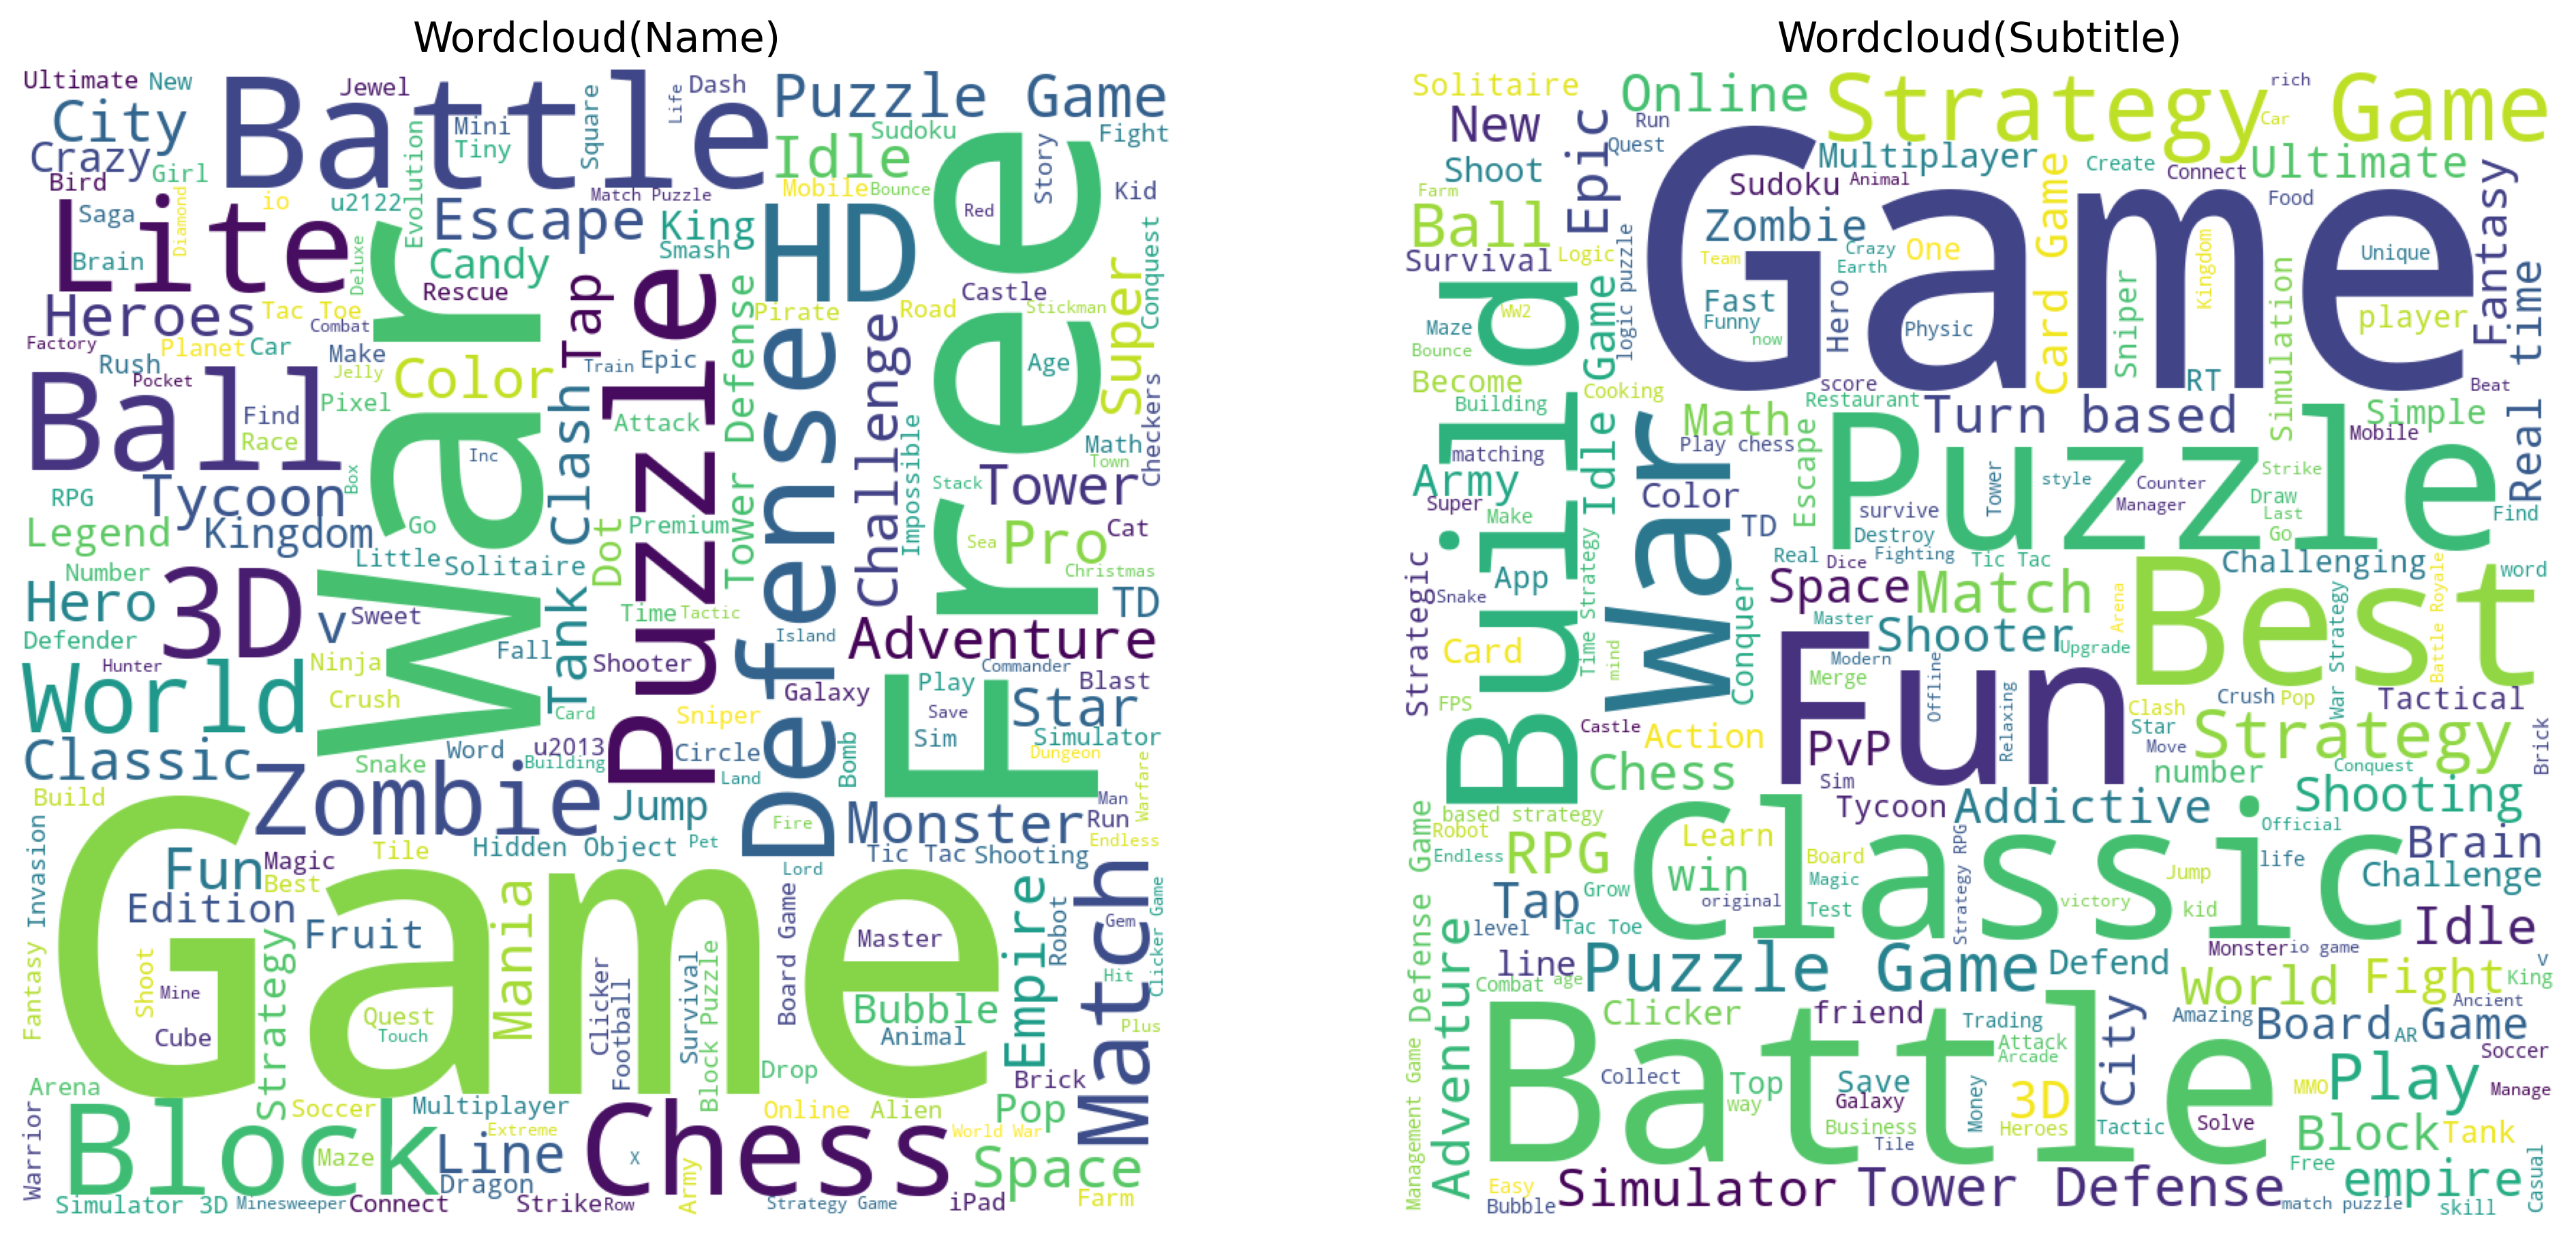

CPU times: user 2.73 s, sys: 152 ms, total: 2.88 s
Wall time: 2.91 s


In [13]:
%%time
fig, ax = plt.subplots(1, 2, figsize=(16,32))
wordcloud = WordCloud(background_color='white',width=800, height=800).generate(' '.join(data['Name']))
wordcloud_sub = WordCloud(background_color='white',width=800, height=800).generate(' '.join(data['Subtitle'].dropna().astype(str)) )
ax[0].imshow(wordcloud)
ax[0].axis('off')
ax[0].set_title('Wordcloud(Name)')
ax[1].imshow(wordcloud_sub)
ax[1].axis('off')
ax[1].set_title('Wordcloud(Subtitle)')
plt.show()

- **Name**
    - Game, Free, War, Defense, Puzzle, Block, Chess
- **Subtitle**
    - Game, Classic, Battle, Puzzle, Best, Fun

## Average User Rating 

In [14]:
aur = data['Average User Rating'].value_counts().sort_index()
p = figure(x_range=list(map(str, aur.index.values)), 
           plot_height=250, title="Average User Rating", 
           toolbar_location=None, 
           tools="")

p.vbar(x=list(map(str, aur.index.values)), 
       top=aur.values, 
       width=0.9, 
       color=Spectral9)

p.xgrid.grid_line_color = None
p.xaxis.axis_label = 'Ratings'
p.yaxis.axis_label = 'Average User Count'
p.y_range.start = 0
show(p)

## Price & Rating

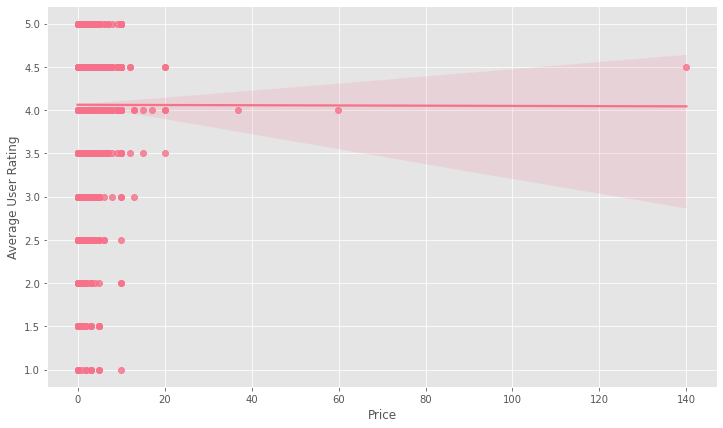

In [15]:
fig, ax = plt.subplots(1,1, figsize=(12, 7), dpi=72)
sns.regplot(data=data, x='Price', y='Average User Rating', ax=ax)
plt.show()

In [16]:
price_list = sorted(data['Price'].dropna().unique())
rating_stat = pd.DataFrame(columns=['mean', 'std', 'count'], index=price_list)
for price in price_list:
    tmp = data[data['Price']==price]['Average User Rating'].dropna()
    rating_stat['mean'][price] = tmp.mean()
    rating_stat['std'][price] = tmp.std()
    rating_stat['count'][price] = len(tmp)

rating_stat.T.head(len(price_list))

0.00      0.99      1.99      2.99      3.99      4.99      5.99    \
mean   4.071225  3.903409  4.022388       4.0  4.161905  4.062162       4.0   
std    0.745921   0.79746  0.814399  0.827804   0.60246  0.780312  0.666667   
count      6325       352       201       252       105       185        28   

         6.99      7.99      8.99    ... 16.99  18.99    19.99  29.99  36.99   \
mean   4.173077      4.15  4.166667  ...    4.0    NaN      4.1    NaN    4.0   
std    0.488719  0.579751  0.389249  ...    NaN    NaN  0.41833    NaN    NaN   
count        26        10        12  ...      1      0        5      0      1   

      37.99  59.99  99.99  139.99 179.99  
mean     NaN    4.0    NaN    4.5    NaN  
std      NaN    NaN    NaN    NaN    NaN  
count      0      1      0      1      0  

[3 rows x 24 columns]

### Heatmap (correlation)


In [20]:
genre = data['Primary Genre'].value_counts()
p = figure(x_range=list(map(str, genre.index.values)), 
           plot_height=250, plot_width=1500, title="Primary Genre", 
           toolbar_location=None, 
           tools="")

p.vbar(x=list(map(str, genre.index.values)), 
       top=genre.values, 
       width=0.9, 
       color=Spectral9)

p.xgrid.grid_line_color = None
p.y_range.start = 0
show(p)

In [22]:
data['Genres'].head()

0              Games, Strategy, Puzzle
1               Games, Strategy, Board
2               Games, Board, Strategy
3              Games, Strategy, Puzzle
4    Games, Strategy, Board, Education
Name: Genres, dtype: object

In [23]:
data['GenreList'] = data['Genres'].apply(lambda s : s.replace('Games','').replace('&',' ').replace(',', ' ').split()) 
data['GenreList'].head()

0              [Strategy, Puzzle]
1               [Strategy, Board]
2               [Board, Strategy]
3              [Strategy, Puzzle]
4    [Strategy, Board, Education]
Name: GenreList, dtype: object

In [24]:
gameTypes = []
for i in data['GenreList']: gameTypes += i
gameTypes = set(gameTypes)
print("There are {} types in the Game Dataset".format(len(set(gameTypes))))

There are 56 types in the Game Dataset


In [25]:
from sklearn.preprocessing import MultiLabelBinarizer 

test = data['GenreList']
mlb = MultiLabelBinarizer()
res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)

/var/folders/l7/zf44w9s95xgcjqjcn66v4b200000gn/T/ipykernel_34821/1494506757.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

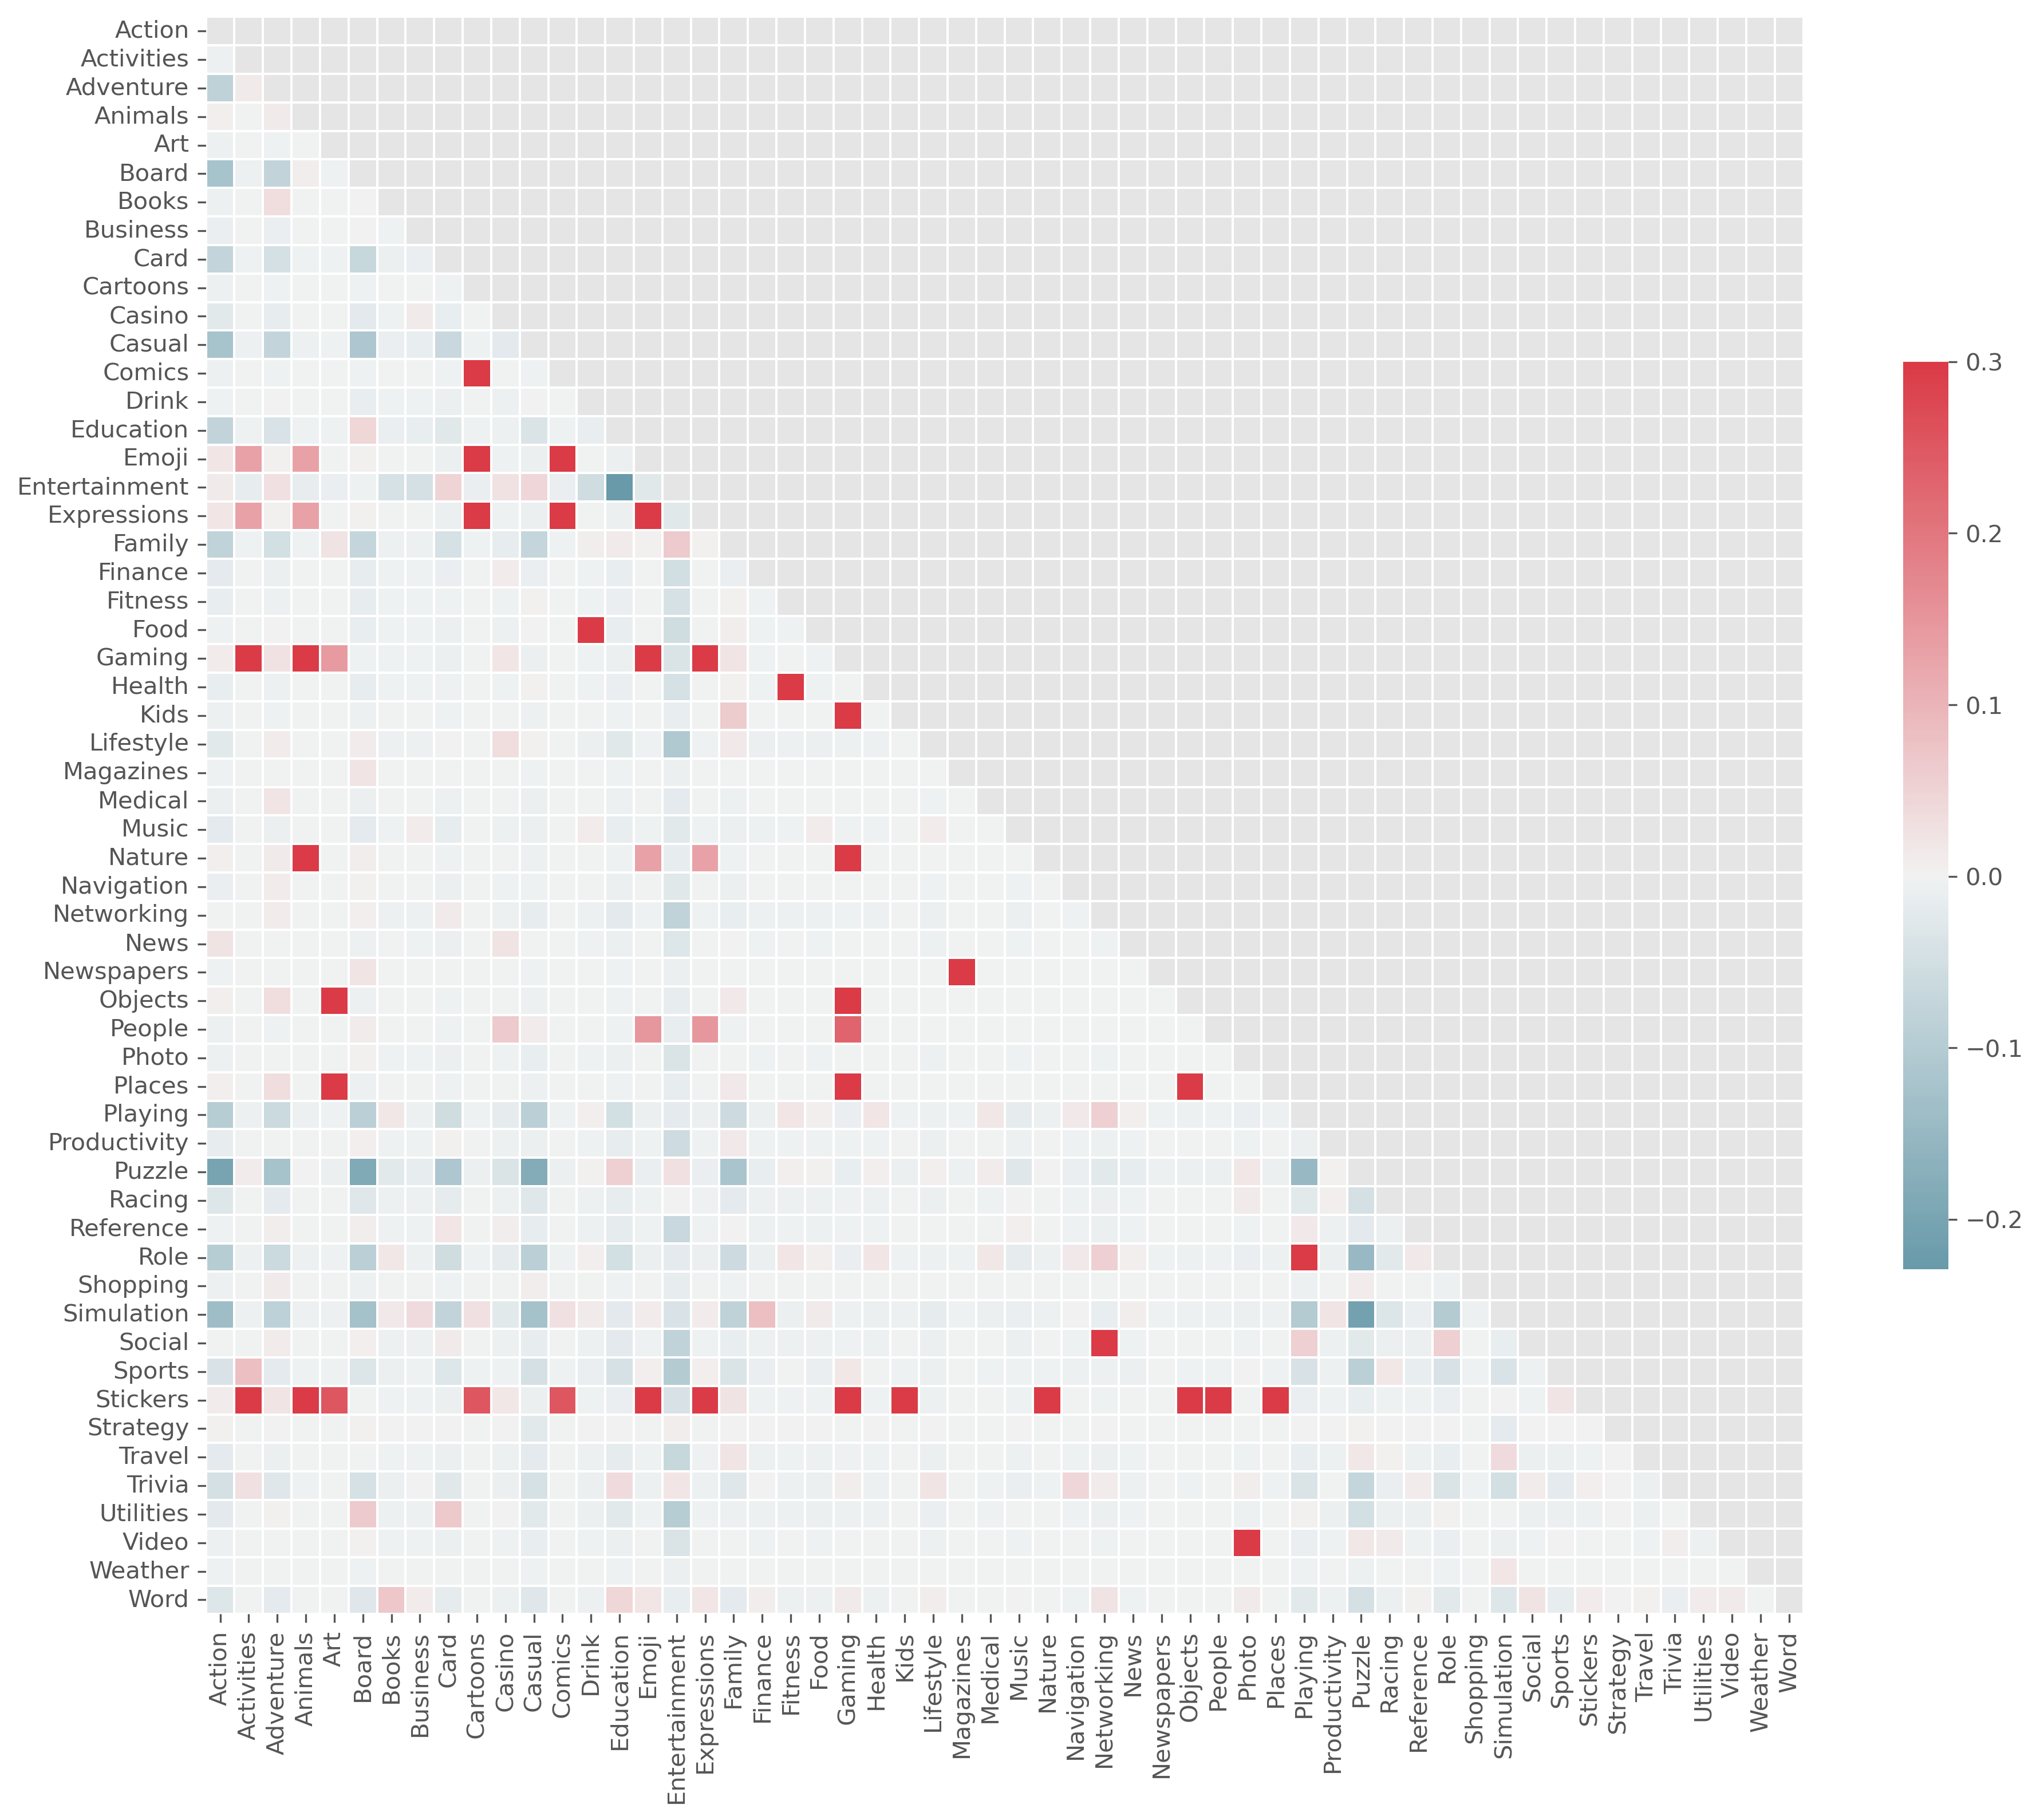

In [26]:
#corr = res.corr()
#mask = np.zeros_like(corr, dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True
#f, ax = plt.subplots(figsize=(15, 14))
#cmap = sns.diverging_palette(220, 10, as_cmap=True)
#sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

corr = res.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(15, 14))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

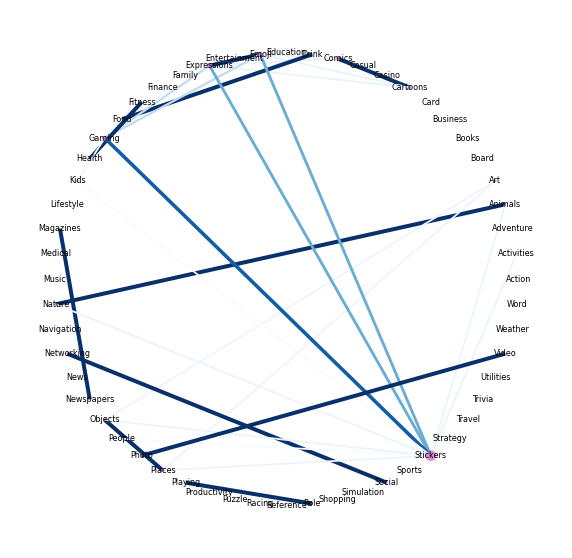

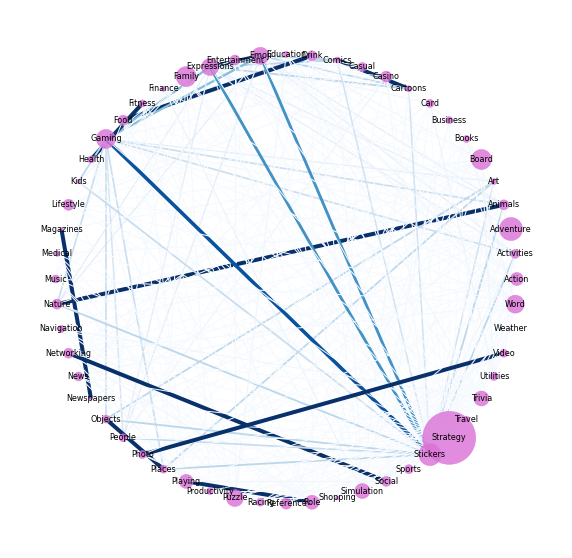

In [27]:
import networkx as nx

stocks = corr.index.values
cor_matrix = np.asmatrix(corr)
G = nx.from_numpy_matrix(cor_matrix)
G = nx.relabel_nodes(G,lambda x: stocks[x])
G.edges(data=True)

def create_corr_network(G, corr_direction, min_correlation):
    H = G.copy()
    for stock1, stock2, weight in G.edges(data=True):
        if corr_direction == "positive":
            if weight["weight"] <0 or weight["weight"] < min_correlation:
                H.remove_edge(stock1, stock2)
                H.remove_edges_from(nx.selfloop_edges(H))
        else:
            if weight["weight"] >=0 or weight["weight"] > min_correlation:
                H.remove_edge(stock1, stock2)
                
    edges,weights = zip(*nx.get_edge_attributes(H,'weight').items())
    weights = tuple([(1+abs(x))**2 for x in weights])
    d = nx.degree(H)
    nodelist, node_sizes = zip(*d)
    positions=nx.circular_layout(H)
    
    plt.figure(figsize=(10,10), dpi=72)

    nx.draw_networkx_nodes(H,positions,node_color='#DA70D6',nodelist=nodelist,
                           node_size=tuple([x**2 for x in node_sizes]),alpha=0.8)
    
    nx.draw_networkx_labels(H, positions, font_size=8, 
                            font_family='sans-serif')
    
    if corr_direction == "positive": edge_colour = plt.cm.Blues 
    else: edge_colour = plt.cm.Orange
        
    nx.draw_networkx_edges(H, positions, edgelist=edges,style='solid',
                          width=weights, edge_color = weights, edge_cmap = edge_colour,
                          edge_vmin = min(weights), edge_vmax=max(weights), arrows=None)
    
    legend = {}
    
    plt.axis('off')
    plt.show() 
    
create_corr_network(G, 'positive', 0.3)
create_corr_network(G, 'positive', -0.3)

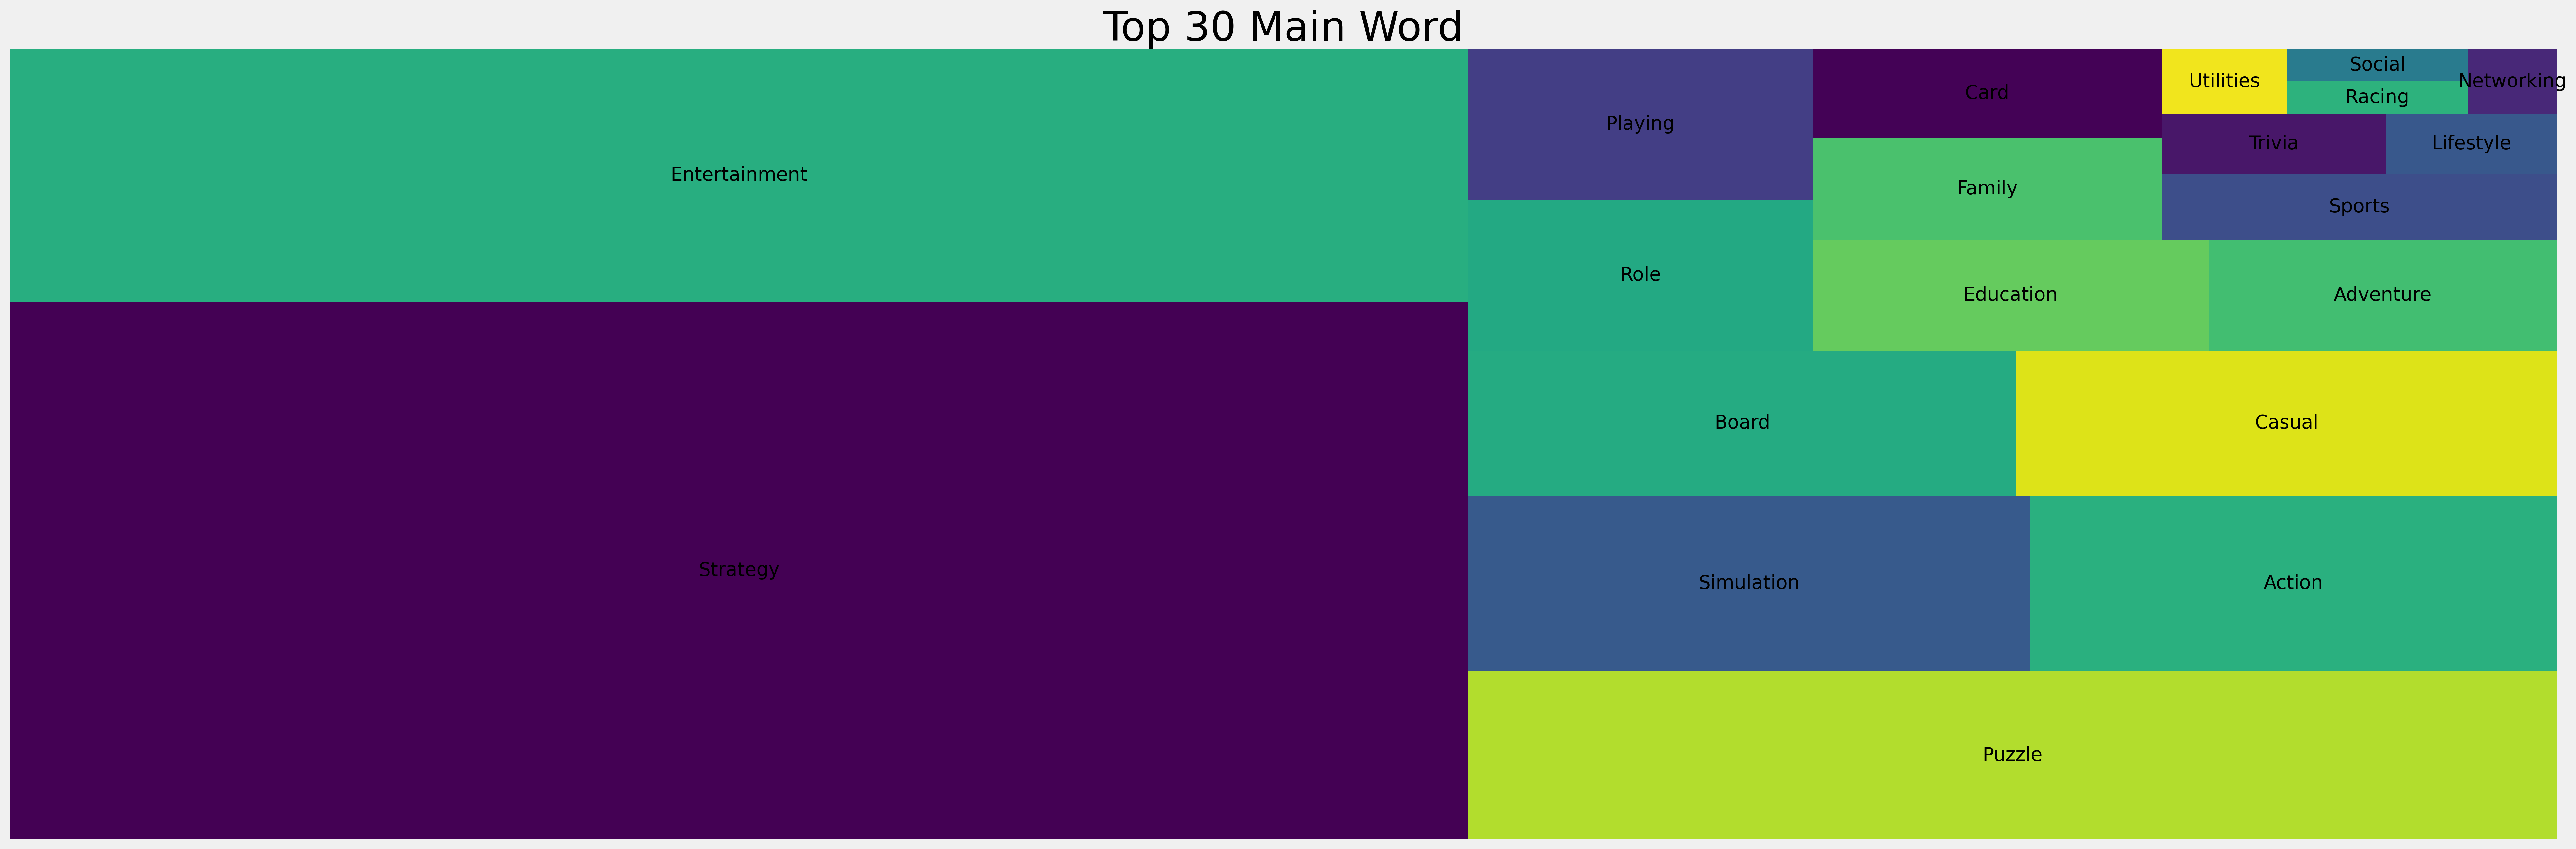

In [30]:
import squarify
y = res.apply(sum).sort_values(ascending=False)[:20]
    
plt.rcParams['figure.figsize'] = (30, 10)
plt.style.use('fivethirtyeight')

squarify.plot(sizes = y.values, label = y.index)
plt.title('Top 30 Main Word', fontsize = 30)
plt.axis('off')
plt.show()

### Waffle Chart (counting base)

In [31]:
!pip install pywaffle
from pywaffle import Waffle

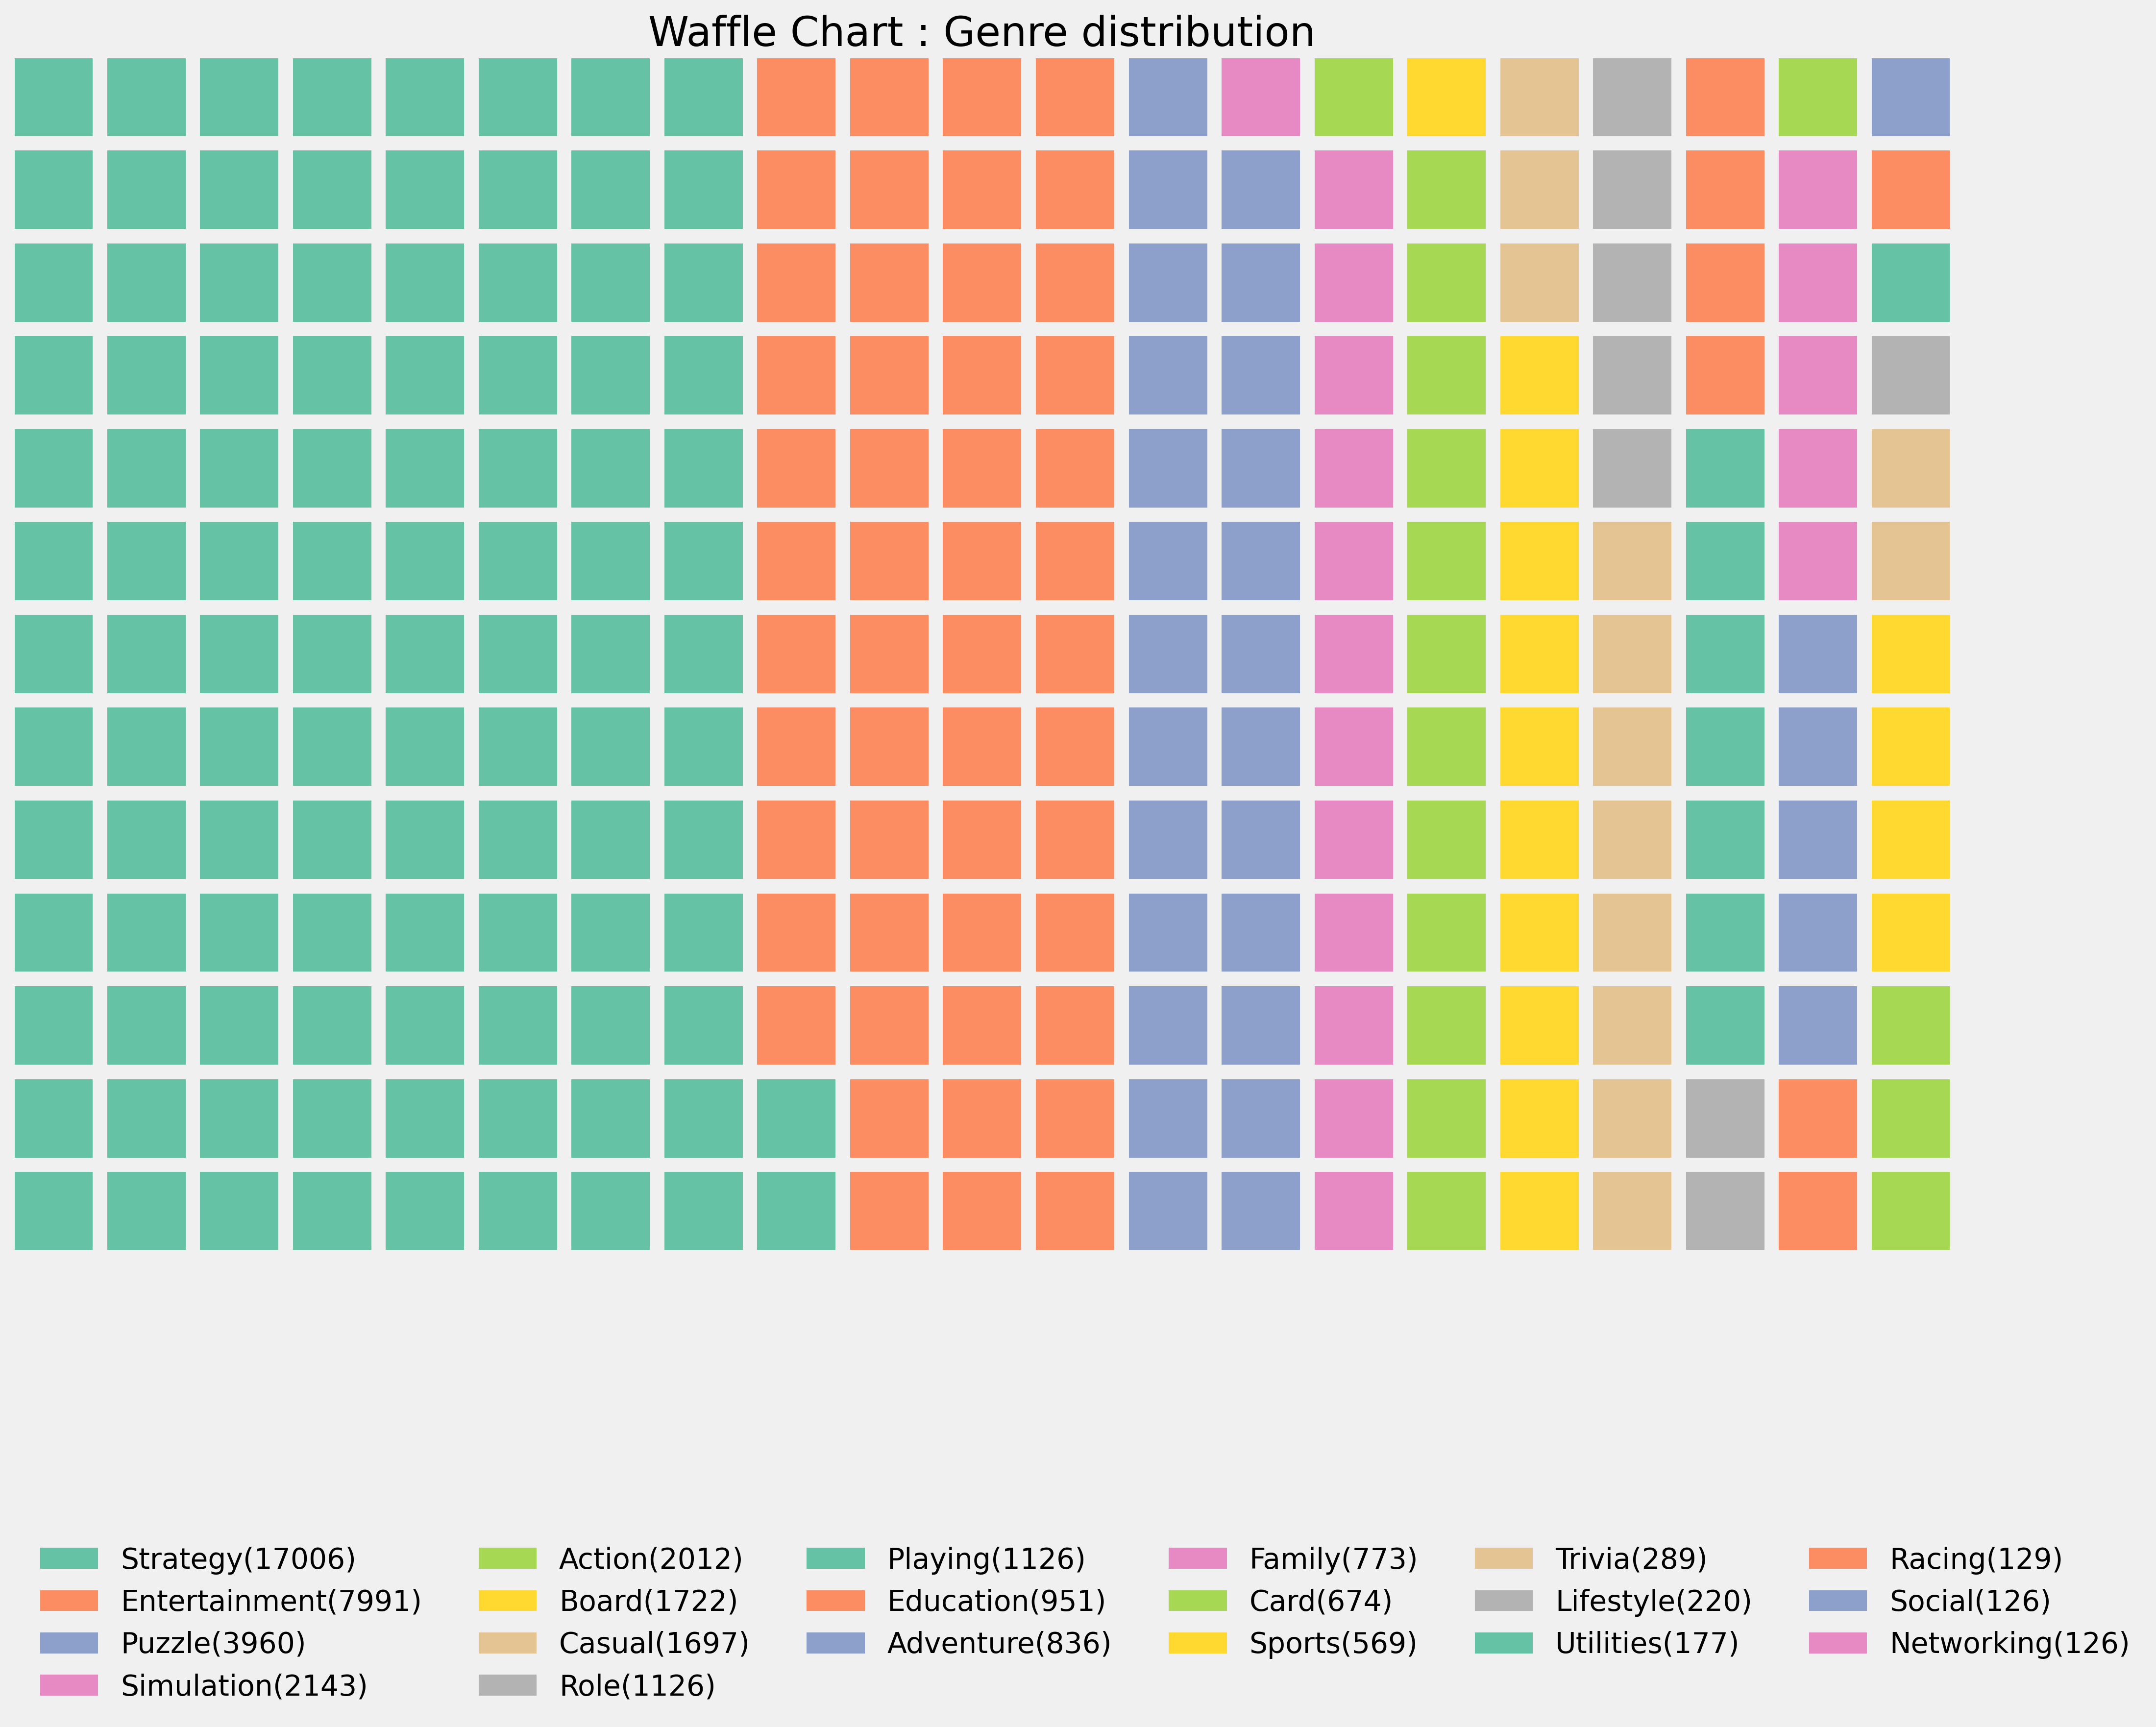

In [42]:
fig = plt.figure(
    FigureClass=Waffle, 
    rows=13, 
    columns=21, 
    values=y,
    labels=["{}({})".format(a, b) for a, b in zip(y.index, y) ],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(y)//3,  'framealpha': 0},
    font_size=25, 
    figsize=(15, 15),  
    icon_legend=True
)

plt.title('Waffle Chart : Genre distribution')

plt.show()